### homework3

In [1]:
from scipy.io import arff
import pandas as pd
import numpy as np

data = arff.loadarff(r'C:\Users\10295\Desktop\4year.arff')
df = pd.DataFrame(data[0])

df['bankruptcy'] = (df['class']==b'1')
del df['class']
df.columns = ['X{0:02d}'.format(k) for k in range(1,65)] + ['bankruptcy']

df.describe()

,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,...,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64
count,9791.000000,9791.000000,9791.000000,9749.000000,9.771000e+03,9791.000000,9791.000000,9773.000000,9792.000000,9791.000000,...,9.792000e+03,9771.000000,9791.000000,9776.000000,9791.000000,9178.000000,9760.000000,9.771000e+03,9749.000000,9561.000000
mean,0.043019,0.596404,0.130959,8.136600,6.465164e+01,-0.059273,0.059446,19.884016,1.882296,0.389040,...,7.686330e+03,-0.992263,0.035022,1.133287,0.856053,118.156064,25.194430,2.015157e+03,8.660813,35.949619
std,0.359321,4.587122,4.559074,290.647281,1.475939e+04,6.812754,0.533344,698.697015,17.674650,4.590299,...,7.605261e+04,77.007971,8.945365,8.038201,26.393305,3230.316692,1099.260821,1.171461e+05,60.838202,483.318623
min,-12.458000,0.000000,-445.910000,-0.045319,-3.794600e+05,-486.820000,-12.458000,-1.848200,-0.032371,-445.910000,...,-7.132200e+05,-7522.100000,-597.420000,-30.892000,-284.380000,0.000000,-12.656000,-1.496500e+04,-0.024390,-0.000015
25%,0.001321,0.263145,0.020377,1.047000,-5.121700e+01,-0.000578,0.003004,0.428300,1.006675,0.294440,...,2.184000e+01,0.003121,0.008768,0.885722,0.000000,5.356325,4.267700,4.323400e+01,2.938800,2.012900
50%,0.041364,0.467740,0.199290,1.591800,-5.557600e-02,0.000000,0.048820,1.088700,1.161300,0.510450,...,9.503300e+02,0.043679,0.098026,0.958305,0.002129,9.482000,6.283550,7.472900e+01,4.848900,4.041600
75%,0.111130,0.689255,0.410670,2.880400,5.573200e+01,0.065322,0.126940,2.691000,1.970225,0.714290,...,4.694550e+03,0.117170,0.242680,0.996163,0.211790,19.506000,9.938200,1.233450e+02,8.363800,9.413500
max,20.482000,446.910000,22.769000,27146.000000,1.034100e+06,322.200000,38.618000,53209.000000,1704.800000,12.602000,...,6.123700e+06,112.020000,226.760000,668.750000,1661.000000,251570.000000,108000.000000,1.077900e+07,5662.400000,21153.000000


In [2]:
sum(df.bankruptcy == True)

515

In [3]:
for column in list(df.columns[df.isnull().sum() > 0]):
    mean_val = df[column].mean()
    df[column].fillna(mean_val, inplace=True)#Fill-in the missing values na with the mean

#sklearn.impute是sklearn0.20.1以后版本才有的函数
#from sklearn.impute import SimpleImputer
#imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
#X_imp = imp_mean.fit_transform(df.values)

In [4]:
df=df.values.astype(np.float)#将DataFrame转换成数组   用于下面切片

In [5]:
from sklearn.model_selection import train_test_split

X, y = df[:, :-1], df[:, -1]

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)#按测试集0.3的比例  将原data set 随机划分为训练集和测试集

In [6]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train).astype(float)
X_test_std = stdsc.transform(X_test).astype(float)#标准化处理数据

### PCA Dimensionality Reduction

In [7]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([1.74965147e-01, 9.12170614e-02, 8.11462753e-02, 6.60978536e-02,
       5.34907000e-02, 4.77403147e-02, 4.52512866e-02, 3.75944904e-02,
       3.09870220e-02, 2.73574041e-02, 2.47781178e-02, 2.37694259e-02,
       2.14071017e-02, 1.93912479e-02, 1.87274814e-02, 1.77110790e-02,
       1.65536886e-02, 1.57051058e-02, 1.56659171e-02, 1.56226617e-02,
       1.55940372e-02, 1.50542306e-02, 1.46645375e-02, 1.37159896e-02,
       1.24855836e-02, 1.19136769e-02, 1.04292709e-02, 1.00335104e-02,
       8.14754016e-03, 7.35890007e-03, 6.54681467e-03, 6.00453134e-03,
       5.15662266e-03, 3.14637614e-03, 2.85083437e-03, 2.37100553e-03,
       1.89838710e-03, 1.66717684e-03, 1.06146851e-03, 9.48607140e-04,
       8.35276042e-04, 5.76474830e-04, 4.32129697e-04, 4.10481782e-04,
       4.05670927e-04, 3.50842516e-04, 3.04907775e-04, 1.60963047e-04,
       1.05934786e-04, 7.59569331e-05, 4.19319942e-05, 2.93811469e-05,
       2.14767430e-05, 7.44698613e-06, 4.95202807e-06, 4.73370690e-06,
      

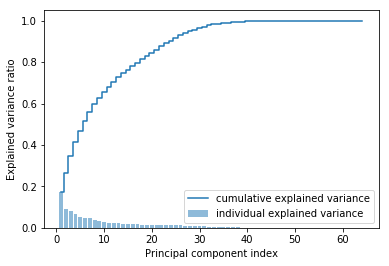

In [9]:
import matplotlib.pyplot as plt

plt.bar(range(1, 65), pca.explained_variance_ratio_, alpha=0.5, align='center',label='individual explained variance')
plt.step(range(1, 65), np.cumsum(pca.explained_variance_ratio_), where='mid',label='cumulative explained variance')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')

plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=3),
                        LogisticRegression(random_state=1))

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('LR_Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

pipe_svm= make_pipeline(StandardScaler(),
                        PCA(n_components=3),
                        SVC(random_state=1))

pipe_svm.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('SVM_Test Accuracy: %.3f' % pipe_svm.score(X_test, y_test))

pipe_dt=make_pipeline(StandardScaler(),
                        PCA(n_components=3),
                        DecisionTreeClassifier(random_state=1))

pipe_dt.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('dt_Test Accuracy: %.3f' % pipe_dt.score(X_test, y_test))

LR_Test Accuracy: 0.946
SVM_Test Accuracy: 0.947
dt_Test Accuracy: 0.900


### Find the optimal hyperparameters

####  LogisticRegression

In [11]:
from sklearn.model_selection import GridSearchCV

param_range_lr = {'logisticregression__C':[0.001,0.01,0.1,1,10,100,1000]}
#Gridsearch中parameter需给出字典序进行搜索
gs_lr = GridSearchCV(estimator=pipe_lr, 
                  param_grid=param_range_lr, 
                  scoring='accuracy', 
                  cv=10,
                  n_jobs=-1)

#找到 LogisticRegression在训练集上拟合的最佳参数
gs_lr = gs_lr.fit(X_train, y_train)
print('Best_LR_Train_Accuracy:%.3f' %gs_lr.best_score_)
print(gs_lr.best_params_)

#采用最佳参数训练出的模型 在测试集上的accuracy
clf_lr=gs_lr.best_estimator_
print('Test accuracy_under_lr_best_paramter: %.3f' % clf_lr.score(X_test, y_test))

Best_LR_Train_Accuracy:0.946
{'logisticregression__C': 0.01}
Test accuracy_under_lr_best_paramter: 0.946


#### SVM                 ...   due to the heavy computation，it will cost a long time to get the results

In [ ]:
from sklearn.model_selection import GridSearchCV

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'svc__C': param_range, 
               'svc__kernel': ['linear']}]
#在GridsearchCV中将svm对应参数处理成字典序 
gs_svm= GridSearchCV(estimator=pipe_svm, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10,
                  n_jobs=-1)

gs_svm= gs_svm.fit(X_train, y_train)
#找到svm在训练集上拟合的最佳参数
gs_svm=gs_svm.fit(X_train, y_train)
print('Best_svm_Train_Accuracy:%.3f' %gs_svm.best_score_)
print(gs_svm.best_params_)

#采用最佳参数训练出的模型 在测试集上的accuracy
clf_svm=gs_svm.best_estimator_
print('Test accuracy_under_svm_best_paramter: %.3f' % clf_svm.score(X_test, y_test))

#### DecisionTree

In [28]:
from sklearn.model_selection import GridSearchCV

depth = range(1,10,1)
leaf = range(1,10,2)
parameters = dict(max_depth=depth, min_samples_leaf=leaf)
dt=DecisionTreeClassifier()
gs_dt=GridSearchCV(dt,parameters,cv=10)

#找到 LogisticRegression在训练集上拟合的最佳参数
gs_dt=gs_dt.fit(X_train, y_train)
print('Best_Dt_Train_Accuracy:%.3f' %gs_dt.best_score_)
print(gs_dt.best_params_)

#采用最佳参数训练出的模型 在测试集上的accuracy
clf_dt=gs_dt.best_estimator_
print('Test accuracy_under_Dt_best_paramter: %.3f' % clf_dt.score(X_test, y_test))

Best_Dt_Train_Accuracy:0.960
{'max_depth': 6, 'min_samples_leaf': 7}
Test accuracy_under_Dt_best_paramter: 0.962
